In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 81
dx = 0.25
dt = 0.0002   
gamma = 1.4
rho_L = 1.0
rho_R = 0.125
VL = 0
VR = 0
PL = 1000*100
PR = 1000*10
T = 0.01

In [3]:
def rho_IC(nx, rho_L, rho_R): 
    rho = numpy.ones(nx)*rho_R
    rho[:int((nx-1)/2)] = rho_L
    return rho

In [4]:
def V_IC(nx, VL, VR):   
    V = numpy.ones(nx)*VR
    V[:int((nx-1)/2)] = VL
    return V

In [5]:
def P_IC(nx, PL, PR):   
    P = numpy.ones(nx)*PR
    P[:int((nx-1)/2)] = PL
    return P

In [6]:
def eT_IC(gamma, p, rho, v):   
    return p/(gamma-1)/rho + 0.5*v**2
    #return ( P/(gamma-1)+.5*rho*V**2 )/rho

In [7]:
eTI = eT_IC(gamma, P_IC(nx,PL,PR), rho_IC(nx,rho_L,rho_R), V_IC(nx,rho_L,rho_R))

In [8]:
u0 = numpy.zeros((nx, 3))
u0[:,0] = rho_IC(nx,rho_L,rho_R)#
u0[:,1] = u0[:,0]*V_IC(nx, VL, VR)
u0[:,2] = u0[:,0]*eT_IC(gamma, P_IC(nx,PL,PR), rho_IC(nx,rho_L,rho_R), V_IC(nx,rho_L,rho_R))
print(u0)

[[  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000000e+00   2.50000500e+05]
 [  1.00000000e+00   0.00000

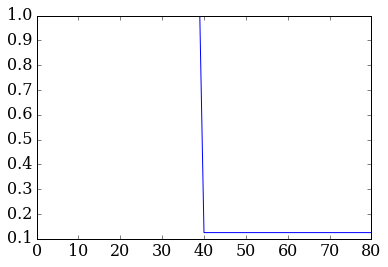

In [9]:
pyplot.plot(range(81),u0[:,0])

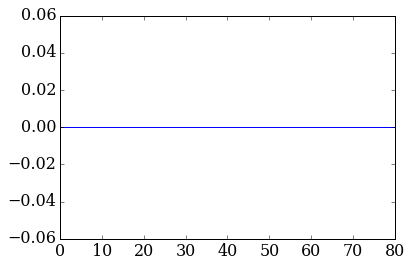

In [10]:
pyplot.plot(range(81),u0[:,1])

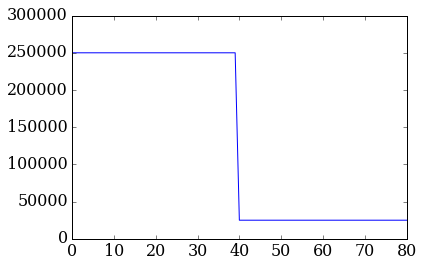

In [11]:
pyplot.plot(range(81),u0[:,2])

In [10]:
def flux(u,gamma,nx):
    f = numpy.empty_like(u)
    
    u1 = u[:,0]
    
    u2 = u[:,1]
    u3 = u[:,2]
    #return 0
    f[:,0] = u2
    f[:,1] = u2**2/u1+(gamma-1)*(u3-0.5*u2**2/u1)
    f[:,2] = (u3 + (gamma-1)*(u3-0.5*u2**2/u1))*u2/u1
    return f

In [11]:
print(flux(u0, gamma, nx))

[[      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2              0.        ]
 [      0.          100000.2

In [28]:
def richtmyer(u0, T, dt, dx, gamma,nx):
    nt = int(T/dt)
    u_n = u0.copy()
    u_n1 = numpy.zeros_like(u0)
    u_half = numpy.zeros_like(u0)
    #print(T, dt, dx, gamma, nx)
    
    for t in range(1):
        #print(t)
        F = flux(u_n,gamma,nx)
        print(F.shape)
        return 0
        u_half[:-1,:] = .5*(u_n[1:,:]+u_n[:-1,:]) - 0.5*dt/dx * (F[1:,:]+F[:-1,:])
        return 0
        Fhalf = flux(u_half,gamma,nx)
        #print(u_half)
        u_n1[1:-1,:] = u_n[1:-1,:]-dt/dx*(Fhalf[1:-1,:]-Fhalf[0:-2,:])
        
        u_n1[0,:] = u_n[0,:]
        u_n1[-1,:] = u_n[-1,:]
        
        u_n = u_n1.copy()
        
    return u_n

In [29]:
ut = richtmyer(u0, T, dt, dx, gamma,nx)
#print(ut)

(81, 3)


In [16]:
numpy.shape(u)

NameError: name 'u' is not defined

In [24]:
ut[50,1]/ut[50,0]

580.57090562845542